# Experimenting with Classifciation models to identify and warn hospitals at risk of high readmissions, in turn, prevent them from incurring financial penalties


## Business Understanding

In [1]:
# We first analyse the dataset thoroughly and
# identify what the most important features are for Classification 

In [2]:
# This script loads necessary libraries for data preprocessing, visualization, and machine learning,  
# including regression, classification, feature selection, and model evaluation.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.metrics import r2_score, mean_squared_error, root_mean_squared_error, precision_score, f1_score, recall_score, accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_auc_score, roc_curve
!pip install statsmodels
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier, plot_tree
from sklearn.feature_selection import VarianceThreshold
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.preprocessing import StandardScaler, RobustScaler
!pip install xgboost
import xgboost as xgb



     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 57.0 MB/s eta 0:00:0000:010:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.9/232.9 kB 34.1 MB/s eta 0:00:00

[notice] A new release of pip is available: 23.0.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 223.6/223.6 MB 6.1 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 201.3/201.3 MB 6.5 MB/s eta 0:00:0000:0100:01

[notice] A new release of pip is available: 23.0.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip


In [3]:
# Loading the HRRP dataset

file_path = "FY_2025_Hospital_Readmissions_Reduction_Program_Hospital.csv"
df = pd.read_csv(file_path)
df

,Facility Name,Facility ID,State,Measure Name,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions,Start Date,End Date
0,SOUTHEAST HEALTH MEDICAL CENTER,10001,AL,READM-30-AMI-HRRP,296.0,NaN,0.9483,13.0146,13.7235,36,07/01/2020,06/30/2023
1,SOUTHEAST HEALTH MEDICAL CENTER,10001,AL,READM-30-CABG-HRRP,151.0,NaN,0.9509,9.6899,10.1898,13,07/01/2020,06/30/2023
2,SOUTHEAST HEALTH MEDICAL CENTER,10001,AL,READM-30-HF-HRRP,681.0,NaN,1.0597,21.5645,20.3495,151,07/01/2020,06/30/2023
3,SOUTHEAST HEALTH MEDICAL CENTER,10001,AL,READM-30-HIP-KNEE-HRRP,NaN,NaN,0.9654,4.2680,4.4211,Too Few to Report,07/01/2020,06/30/2023
4,SOUTHEAST HEALTH MEDICAL CENTER,10001,AL,READM-30-PN-HRRP,490.0,NaN,0.9715,16.1137,16.5863,77,07/01/2020,06/30/2023
...,...,...,...,...,...,...,...,...,...,...,...,...
18505,EXCEPTIONAL COMMUNITY HOSPITAL LUBBOCK,670327,TX,READM-30-HIP-KNEE-HRRP,NaN,5.0,NaN,NaN,NaN,NaN,07/01/2020,06/30/2023
18506,EXCEPTIONAL COMMUNITY HOSPITAL LUBBOCK,670327,TX,READM-30-HF-HRRP,NaN,5.0,NaN,NaN,NaN,NaN,07/01/2020,06/30/2023
18507,EXCEPTIONAL COMMUNITY HOSPITAL LUBBOCK,670327,TX,READM-30-COPD-HRRP,NaN,5.0,NaN,NaN,NaN,NaN,07/01/2020,06/30/2023
18508,EXCEPTIONAL COMMUNITY HOSPITAL LUBBOCK,670327,TX,READM-30-CABG-HRRP,NaN,5.0,NaN,NaN,NaN,NaN,07/01/2020,06/30/2023


In [4]:
# From looking at the dataset I could see categorical features, many missing values, and certain features 
# like 'Start Date' & 'End Date' that would logically be inconsequential to our regression model
# I began the data cleaning/preparation

In [5]:
# Removing inconsequential features like 'Start Date' & 'End Date' 
dfd = df[['Facility ID', 'Measure Name','Number of Discharges', 'Excess Readmission Ratio', 'Predicted Readmission Rate', 'Expected Readmission Rate', 'Number of Readmissions']]

## Data Understanding

In [6]:
# Percentage of missing data

print(dfd.isna().mean()*100)

Facility ID                    0.000000
Measure Name                   0.000000
Number of Discharges          54.943274
Excess Readmission Ratio      35.564560
Predicted Readmission Rate    35.564560
Expected Readmission Rate     35.564560
Number of Readmissions        35.564560
dtype: float64


In [7]:
dfd.dtypes

Facility ID                     int64
Measure Name                   object
Number of Discharges          float64
Excess Readmission Ratio      float64
Predicted Readmission Rate    float64
Expected Readmission Rate     float64
Number of Readmissions         object
dtype: object

## Data Preparation

In [8]:
# The 'Number of Readmissions' feature should be an int or float type but it is an object type 
# I will now convert this feature back into its proper type

### Handling missing values

In [9]:
# Converting 'Number of Readmissions' from an object to a float (categorical variable to numerical variable)
dfd['Number of Readmissions'] = pd.to_numeric(dfd['Number of Readmissions'], errors='coerce')

/tmp/ipykernel_47/2104236923.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfd['Number of Readmissions'] = pd.to_numeric(dfd['Number of Readmissions'], errors='coerce')


In [10]:
# Removing null value rows from the dataframe

dfd_dna = dfd.dropna()
dfd_dna

,Facility ID,Measure Name,Number of Discharges,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions
0,10001,READM-30-AMI-HRRP,296.0,0.9483,13.0146,13.7235,36.0
1,10001,READM-30-CABG-HRRP,151.0,0.9509,9.6899,10.1898,13.0
2,10001,READM-30-HF-HRRP,681.0,1.0597,21.5645,20.3495,151.0
4,10001,READM-30-PN-HRRP,490.0,0.9715,16.1137,16.5863,77.0
5,10001,READM-30-COPD-HRRP,130.0,0.9330,15.4544,16.5637,16.0
...,...,...,...,...,...,...,...
18356,670122,READM-30-HF-HRRP,656.0,1.0197,22.3444,21.9129,148.0
18357,670122,READM-30-COPD-HRRP,120.0,1.0179,19.8986,19.5481,25.0
18358,670122,READM-30-CABG-HRRP,100.0,1.1076,10.6921,9.6535,14.0
18359,670122,READM-30-AMI-HRRP,136.0,0.9751,14.1385,14.4991,18.0


In [11]:
# check for missing values
dfd_dna.isna().sum()

Facility ID                   0
Measure Name                  0
Number of Discharges          0
Excess Readmission Ratio      0
Predicted Readmission Rate    0
Expected Readmission Rate     0
Number of Readmissions        0
dtype: int64

### Handling categorical variables

In [12]:
# Convert categorical feature Measure Name into a numerical feature fit for regression
dfdv =pd.get_dummies(dfd_dna)
dfdv

,Facility ID,Number of Discharges,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions,Measure Name_READM-30-AMI-HRRP,Measure Name_READM-30-CABG-HRRP,Measure Name_READM-30-COPD-HRRP,Measure Name_READM-30-HF-HRRP,Measure Name_READM-30-HIP-KNEE-HRRP,Measure Name_READM-30-PN-HRRP
0,10001,296.0,0.9483,13.0146,13.7235,36.0,True,False,False,False,False,False
1,10001,151.0,0.9509,9.6899,10.1898,13.0,False,True,False,False,False,False
2,10001,681.0,1.0597,21.5645,20.3495,151.0,False,False,False,True,False,False
4,10001,490.0,0.9715,16.1137,16.5863,77.0,False,False,False,False,False,True
5,10001,130.0,0.9330,15.4544,16.5637,16.0,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
18356,670122,656.0,1.0197,22.3444,21.9129,148.0,False,False,False,True,False,False
18357,670122,120.0,1.0179,19.8986,19.5481,25.0,False,False,True,False,False,False
18358,670122,100.0,1.1076,10.6921,9.6535,14.0,False,True,False,False,False,False
18359,670122,136.0,0.9751,14.1385,14.4991,18.0,True,False,False,False,False,False


In [13]:
# Iterative feature selection is conducted based on a trade-off of the following metrics

In [14]:
dfdv.describe()

,Facility ID,Number of Discharges,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions
count,8121.000000,8121.00000,8121.000000,8121.000000,8121.000000,8121.000000
mean,256179.848295,286.80101,1.009233,16.696794,16.549613,48.074868
std,155404.795012,265.54472,0.078230,3.862805,3.656800,48.488707
min,10001.000000,25.00000,0.477900,1.674200,2.892100,11.000000
25%,110042.000000,120.00000,0.963500,14.701200,14.779000,19.000000
50%,250001.000000,203.00000,1.007200,17.258700,17.185500,31.000000
75%,390001.000000,361.00000,1.052700,19.324900,19.200500,59.000000
max,670260.000000,4501.00000,1.643000,27.809500,25.394200,877.000000


In [15]:
dfdv.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8121 entries, 0 to 18422
Data columns (total 12 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Facility ID                          8121 non-null   int64  
 1   Number of Discharges                 8121 non-null   float64
 2   Excess Readmission Ratio             8121 non-null   float64
 3   Predicted Readmission Rate           8121 non-null   float64
 4   Expected Readmission Rate            8121 non-null   float64
 5   Number of Readmissions               8121 non-null   float64
 6   Measure Name_READM-30-AMI-HRRP       8121 non-null   bool   
 7   Measure Name_READM-30-CABG-HRRP      8121 non-null   bool   
 8   Measure Name_READM-30-COPD-HRRP      8121 non-null   bool   
 9   Measure Name_READM-30-HF-HRRP        8121 non-null   bool   
 10  Measure Name_READM-30-HIP-KNEE-HRRP  8121 non-null   bool   
 11  Measure Name_READM-30-PN-HRRP     

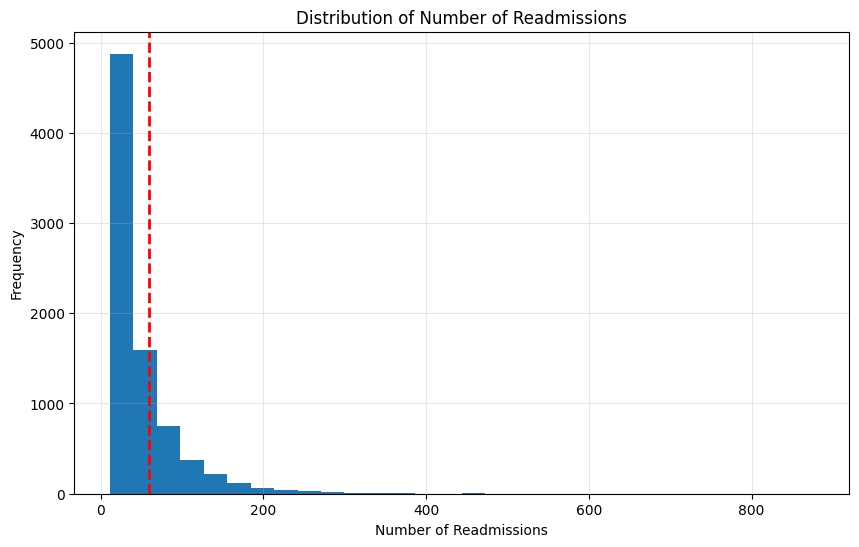

In [16]:
# Observe the distribution and threshold of readmissions before financial penalty was applied on hospitals

plt.figure(figsize=(10,6))
plt.hist(dfdv['Number of Readmissions'], bins=30)
plt.axvline(dfdv['Number of Readmissions'].quantile(0.75), color='red', linestyle='dashed', linewidth=2)
plt.title('Distribution of Number of Readmissions')
plt.xlabel('Number of Readmissions')
plt.ylabel('Frequency')
plt.grid(True, alpha=0.3)
plt.show()

In [17]:
dfdv['Number of Readmissions'].quantile(0.75)

np.float64(59.0)

In [18]:
# Creating target variable based on Number of Readmissions
# Using mean as the threshold
readmission_threshold = dfdv['Number of Readmissions'].quantile(0.75)
print(f"Mean Number of Readmissions: {readmission_threshold:.2f}")


Mean Number of Readmissions: 59.00


In [19]:
# Create the target variable
dfdv['High_Readmission_Volume'] = (dfdv['Number of Readmissions'] > readmission_threshold).astype(float)

In [20]:
dfdv['High_Readmission_Volume']

0        0.0
1        0.0
2        1.0
4        1.0
5        0.0
        ... 
18356    1.0
18357    0.0
18358    0.0
18359    0.0
18422    0.0
Name: High_Readmission_Volume, Length: 8121, dtype: float64

In [21]:
# Check class balance
class_balance = dfdv['High_Readmission_Volume'].value_counts(normalize=True) * 100
print(f"Class distribution: {class_balance[0]:.1f}% low volume, {class_balance[1]:.1f}% high volume")


Class distribution: 75.3% low volume, 24.7% high volume


In [22]:
target = 'High_Readmission_Volume'

## Data Modelling

### Random Forest Classification Model

In [43]:
# Define the target variable
y = dfdv['High_Readmission_Volume']

# Define the feature variables by dropping the target from the dataframe
X = dfdv.drop(['High_Readmission_Volume', 'Number of Readmissions', 'Facility ID', 'Measure Name_READM-30-AMI-HRRP', 'Measure Name_READM-30-CABG-HRRP', 'Measure Name_READM-30-HIP-KNEE-HRRP', 'Measure Name_READM-30-PN-HRRP', 'Expected Readmission Rate', 'Excess Readmission Ratio'], axis=1)

#X = dfdv.drop(['High_Readmission_Volume', 'Number of Readmissions', 'Facility ID', 'Measure Name_READM-30-AMI-HRRP', 'Measure Name_READM-30-CABG-HRRP', 'Measure Name_READM-30-HIP-KNEE-HRRP', 'Measure Name_READM-30-PN-HRRP', 'Expected Readmission Rate'], axis=1)
#X = dfdv[['Number of Discharges']]
#X = dfdv.drop(['High_Readmission_Volume', 'Number of Readmissions'], axis=1)

# Split the data: 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

# Train a model
model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced', max_depth=3)
model.fit(X_train, y_train)


RandomForestClassifier(class_weight='balanced', max_depth=3, random_state=42)

## Evaluation

In [44]:
def evaluate_model_test(X_test, y_test):
    '''Evaluates the model based on test data (a.k.a. unseen data) and returns metrics 
    such as accuracy, precision, recall and f1_score '''
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")

In [46]:
evaluate_model_test(X_test, y_test)

Accuracy: 0.9508
Precision: 0.8537
Recall: 0.9678
F1 Score: 0.9072


In [48]:
def cross_validation(model, X, y):
    
    '''Cross-validating the model for 5 different train test splits and returning
    the average f1_score'''
    cv_scores = cross_val_score(model, X, y, cv=5, scoring='f1')
    print(f"Cross-validated F1_Score: {cv_scores.mean():.4f} ± {cv_scores.std():.4f}")


In [49]:
cross_validation(model, X, y)

Cross-validated F1_Score: 0.8944 ± 0.0119


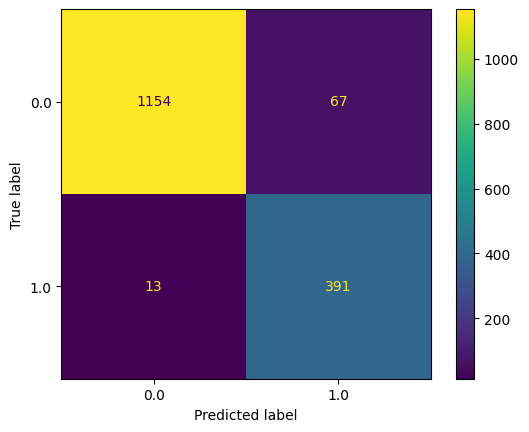

In [26]:
ConfusionMatrixDisplay.from_estimator(model, X_test, y_test)

In [27]:
cm = confusion_matrix(y_test,y_pred)
cm

array([[1154,   67],
       [  13,  391]])

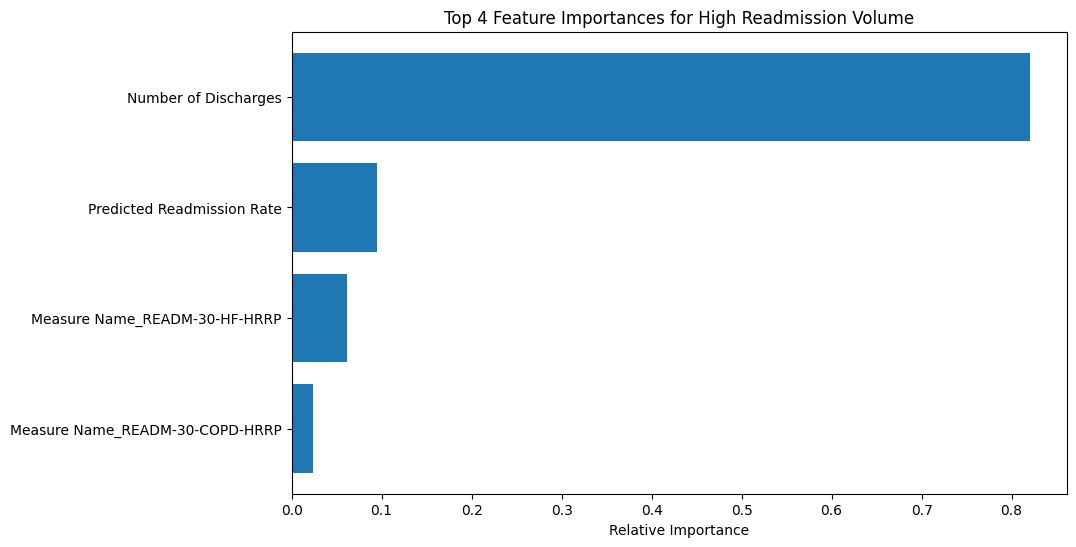

In [28]:
#Plot top feature importance

if len(X.columns) > 15:
    n_features = 15
else:
    n_features = len(X.columns)

importances = model.feature_importances_

# Get the feature names
features = X.columns

# Sort the features by importance
indices = np.argsort(importances)

# Plot the feature importance
plt.figure(figsize=(10, 6))
plt.title(f'Top {n_features} Feature Importances for High Readmission Volume')
plt.barh(range(len(indices)), importances[indices], align='center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Relative Importance')
plt.show()

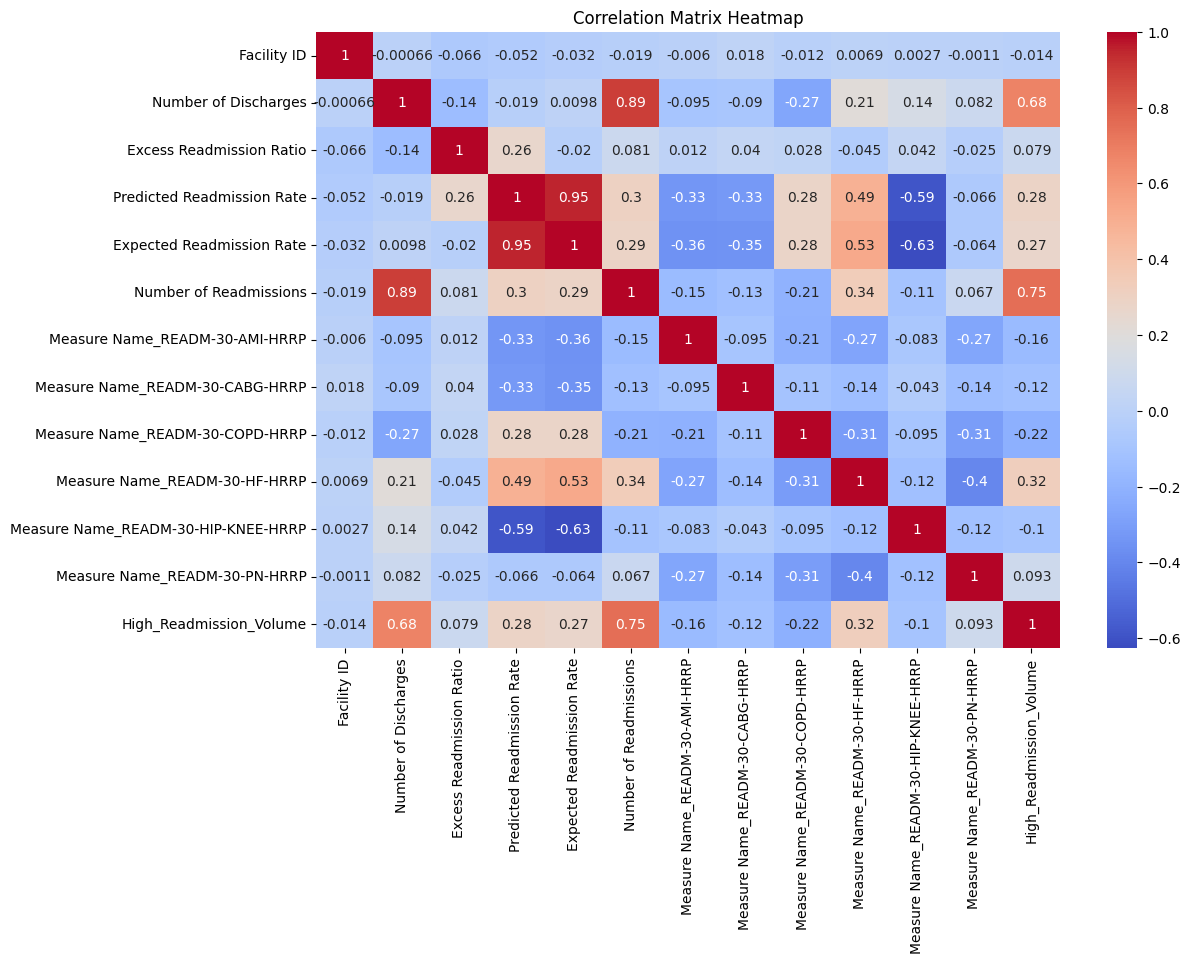

In [29]:
corr_matrix = dfdv.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()

In [30]:
# Identify multicollinearity of independent variable using Variance Inflation Factor (VIF<5)

X_vif = X.astype(float)

# Create a DataFrame to store VIF values
vif_data = pd.DataFrame()

# Assign the column names of X_vif to the 'Feature' column in vif_data
vif_data['Feature'] = X_vif.columns

# Calculate the VIF for each feature and store in the 'VIF' column
vif_data['VIF'] = [variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])]

# Print the VIF data
print(vif_data)

                           Feature       VIF
0             Number of Discharges  2.231771
1       Predicted Readmission Rate  4.090815
2  Measure Name_READM-30-COPD-HRRP  1.727433
3    Measure Name_READM-30-HF-HRRP  1.977282


/tmp/ipykernel_47/2370313955.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="VIF", y="Feature", data=vif_data, palette="viridis")


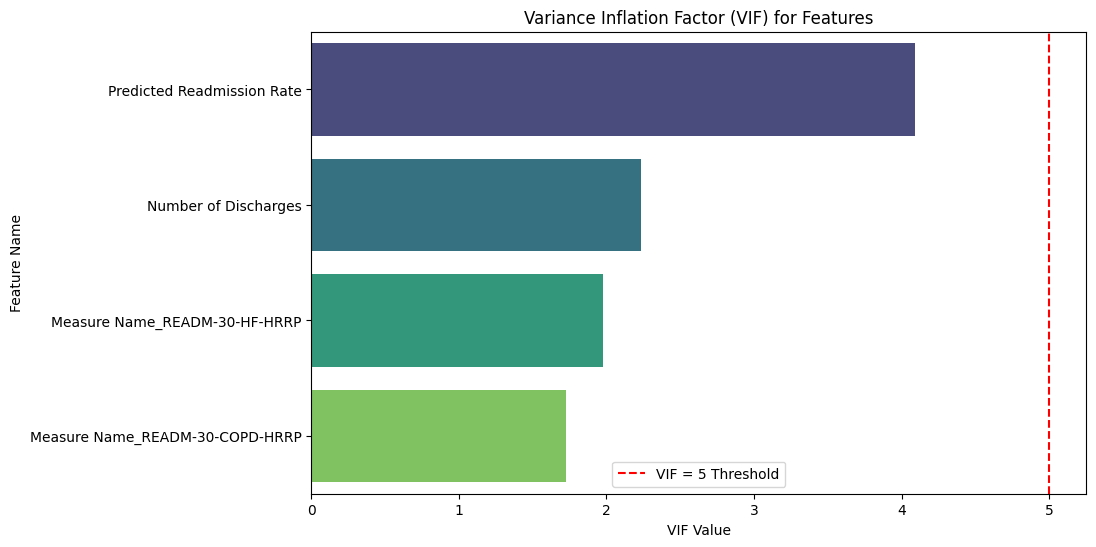

In [31]:
# Visualising the VIF <5 to prevent multicollinearity of independent variables within the model

X_vif = X.astype(float)

# Create a DataFrame to store VIF values
vif_data = pd.DataFrame()
vif_data['Feature'] = X_vif.columns
vif_data['VIF'] = [variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])]

# Sort the VIF values in descending order
vif_data = vif_data.sort_values(by="VIF", ascending=False)

# Plot the VIF values using a bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x="VIF", y="Feature", data=vif_data, palette="viridis")
plt.title("Variance Inflation Factor (VIF) for Features")
plt.xlabel("VIF Value")
plt.ylabel("Feature Name")
plt.axvline(x=5, color='red', linestyle='--', label="VIF = 5 Threshold")
plt.legend()
plt.show()

In [32]:
corr_matrix["High_Readmission_Volume"].sort_values(ascending=False)

High_Readmission_Volume                1.000000
Number of Readmissions                 0.747261
Number of Discharges                   0.676509
Measure Name_READM-30-HF-HRRP          0.321589
Predicted Readmission Rate             0.282814
Expected Readmission Rate              0.266396
Measure Name_READM-30-PN-HRRP          0.092617
Excess Readmission Ratio               0.078820
Facility ID                           -0.014012
Measure Name_READM-30-HIP-KNEE-HRRP   -0.100866
Measure Name_READM-30-CABG-HRRP       -0.121951
Measure Name_READM-30-AMI-HRRP        -0.158586
Measure Name_READM-30-COPD-HRRP       -0.217667
Name: High_Readmission_Volume, dtype: float64

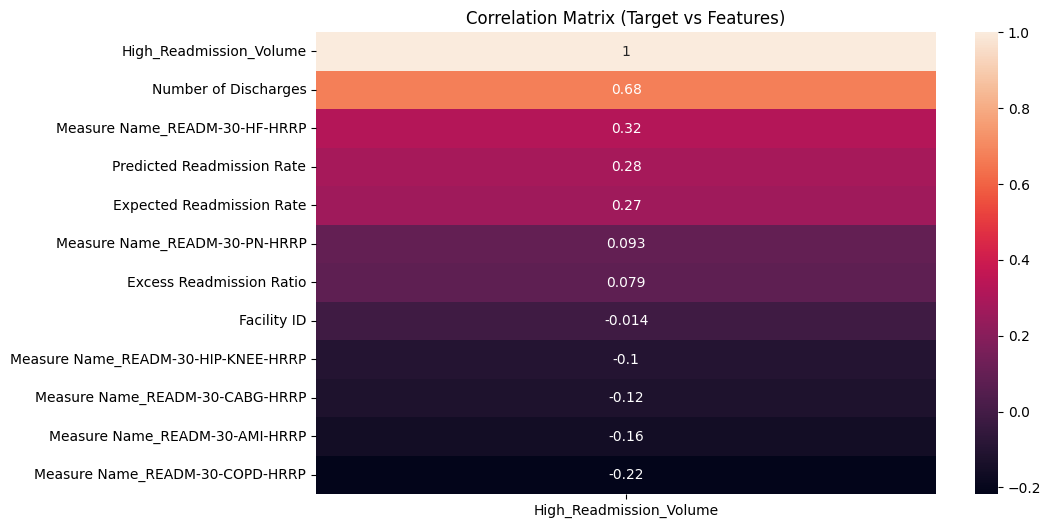

In [33]:
# Calculate the correlation matrix
dfdv_corr_all3 = dfdv.drop(['Number of Readmissions'], axis=1)
corr_matrix = dfdv_corr_all3.corr()

# Plot the correlation matrix for the target variable
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix[['High_Readmission_Volume']].sort_values(by='High_Readmission_Volume', ascending=False), annot=True)
plt.title('Correlation Matrix (Target vs Features)')
plt.show()

### XGBoost Classification Model

In [55]:
y = dfdv['High_Readmission_Volume']

# Define the feature variables by dropping the target from the dataframe
#X = dfdv.drop(['High_Readmission_Volume', 'Number of Readmissions'], axis=1)
# Define the feature variables by dropping the target from the dataframe
X = dfdv.drop(['High_Readmission_Volume', 'Number of Readmissions', 'Facility ID', 'Measure Name_READM-30-AMI-HRRP', 'Measure Name_READM-30-CABG-HRRP', 'Measure Name_READM-30-HIP-KNEE-HRRP', 'Measure Name_READM-30-PN-HRRP', 'Expected Readmission Rate', 'Measure Name_READM-30-COPD-HRRP',
       'Measure Name_READM-30-HF-HRRP'], axis=1)
#X = dfdv[['Number of Discharges']]

# Split the data: 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train an XGBoost model
model = xgb.XGBClassifier(n_estimators=100, max_depth=1, learning_rate=0.1, use_label_encoder=False, eval_metric="logloss")
model.fit(X_train, y_train)



/opt/venv/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [12:25:08] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=1,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

In [57]:
evaluate_model_test(X_test, y_test)

Accuracy: 0.9785
Precision: 0.9743
Recall: 0.9381
F1 Score: 0.9559


In [59]:
cross_validation(model, X, y)

Cross-validated F1_Score: 0.9491 ± 0.0054


/opt/venv/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [12:25:35] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/venv/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [12:25:36] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/venv/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [12:25:36] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/venv/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [12:25:36] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/venv/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [12:25:36] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encode

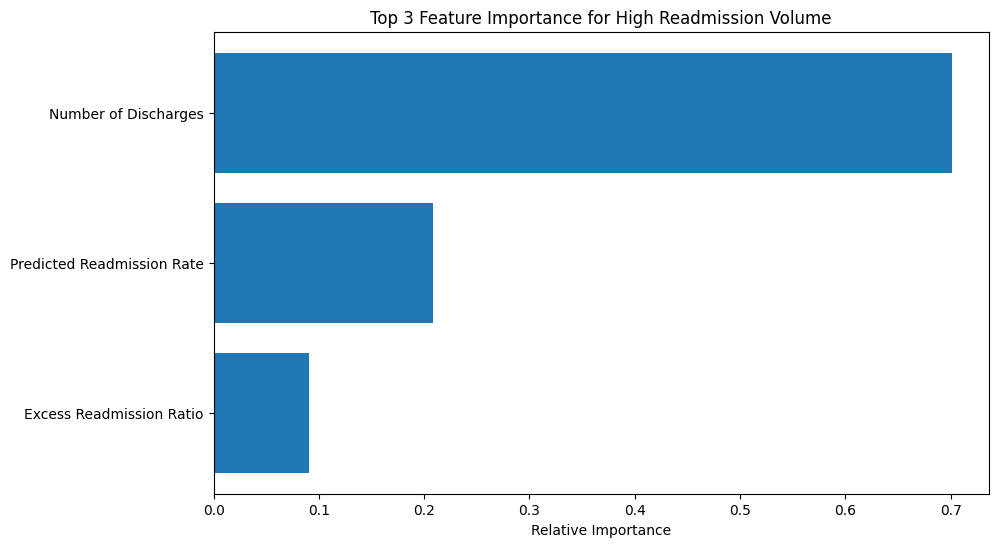

In [36]:
# Plot the top features based on importance
if len(X.columns) > 15:
    n_features = 15
else:
    n_features = len(X.columns)

importances = model.feature_importances_

# Get the feature names
features = X.columns

# Sort the features by importance
indices = np.argsort(importances)

# Plot the feature importance
plt.figure(figsize=(10, 6))
plt.title(f'Top {n_features} Feature Importance for High Readmission Volume')
plt.barh(range(len(indices)), importances[indices], align='center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Relative Importance')
plt.show()

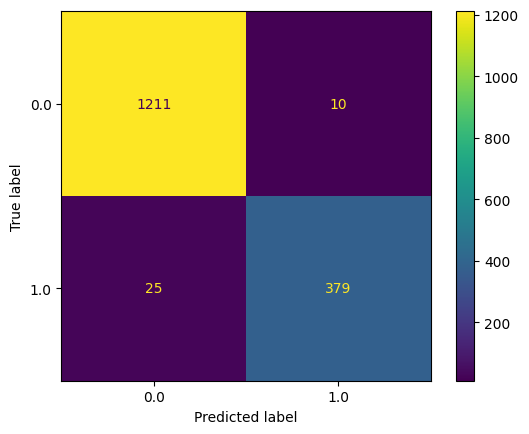

In [38]:
# Confusion matrix plot
ConfusionMatrixDisplay.from_estimator(model, X_test, y_test)

In [39]:
cm = confusion_matrix(y_test,y_pred)
cm

array([[1211,   10],
       [  25,  379]])